## CDC Behavioral Risk Factors Surveillence System (BRFSS)
Diabetes health indicator

reference: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
df.Income

0         3.0
1         1.0
2         8.0
3         6.0
4         4.0
         ... 
253675    7.0
253676    4.0
253677    2.0
253678    1.0
253679    2.0
Name: Income, Length: 253680, dtype: float64

In [4]:
df.Income.value_counts()

Income
8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: count, dtype: int64

In [5]:
df.iloc[0]

Diabetes_binary          0.0
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     40.0
Smoker                   1.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             0.0
Fruits                   0.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  5.0
MentHlth                18.0
PhysHlth                15.0
DiffWalk                 1.0
Sex                      0.0
Age                      9.0
Education                4.0
Income                   3.0
Name: 0, dtype: float64

In [6]:
# find the total number of people with diabetes
len(df.loc[df['Diabetes_binary'] == 1.0])

35346

In [7]:
diabetes_yes = 35346

In [8]:
# find the amount of people who have and diabetes and smoke
len(df.loc[(df['Diabetes_binary'] == 1.0) & (df['Smoker'] == 1.0)])

18317

In [9]:
diabates_smokers = 18317

In [10]:
diabates_smokers/diabetes_yes

0.5182198834380128

#### 51.82% of people with diabetes are also smokers

In [11]:
# find the amount of people with diabetes and BMI >= 25
len(df.loc[(df['Diabetes_binary'] == 1) & (df['BMI'] >= 25)])

31249

31,249 people have diabetes and a BMI >= 25

In [12]:
diabetes_overweight = 31249
diabetes_overweight/diabetes_yes

0.8840887229106547

#### 88.41% of people with diabetes also have a BMI >= 25

In [13]:
df['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

In [14]:
bmi_mean = df.BMI.mean()
df.BMI.map(lambda x: x - bmi_mean)

0         11.617636
1         -3.382364
2         -0.382364
3         -1.382364
4         -4.382364
            ...    
253675    16.617636
253676   -10.382364
253677    -0.382364
253678    -5.382364
253679    -3.382364
Name: BMI, Length: 253680, dtype: float64

In [15]:
df.BMI.head()

0    40.0
1    25.0
2    28.0
3    27.0
4    24.0
Name: BMI, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [17]:
# look at mean values of the data grouped by sex and diabetes
df.groupby(['Sex', 'Diabetes_binary']).mean()

HighBP  HighChol  CholCheck        BMI    Smoker  \
Sex Diabetes_binary                                                       
0.0 0.0              0.354054  0.370265   0.962303  27.478727  0.394447   
    1.0              0.755255  0.680083   0.993808  32.505459  0.451904   
1.0 0.0              0.406000  0.402592   0.951768  28.232170  0.478701   
    1.0              0.749867  0.659286   0.992501  31.333629  0.590316   

                       Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  \
Sex Diabetes_binary                                                           
0.0 0.0              0.032008              0.055413      0.767252  0.680317   
    1.0              0.094020              0.182391      0.589322  0.625496   
1.0 0.0              0.032383              0.096738      0.789577  0.592407   
    1.0              0.090759              0.266903      0.675347  0.541895   

                      Veggies  HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  \
Sex Diabetes_binary                                                            
0.0 0.0              0.843683           0.060714       0.954339     0.091014   
    1.0              0.768182           0.016838       0.957634     0.123622   
1.0 0.0              0.789872           0.062487       0.943516     0.067172   
    1.0              0.743608           0.030824       0.962090     0.086566   

                      GenHlth  MentHlth  PhysHlth  DiffWalk       Age  \
Sex Diabetes_binary                                                     
0.0 0.0              2.390869  3.470537  3.958313  0.156066  7.921943   
    1.0              3.364782  5.359024  8.718864  0.429689  9.342730   
1.0 0.0              2.377774  2.335904  3.227475  0.108366  7.673413   
    1.0              3.210747  3.486389  7.123472  0.307647  9.418541   

                     Education    Income  
Sex Diabetes_binary                       
0.0 0.0               5.090763  5.983514  
    1.0               4.648417  4.724893  
1.0 0.0               5.111574  6.460310  
    1.0               4.851078  5.737585

In [18]:
# find the number of males and females with diabetes
filtered_df = df[df['Diabetes_binary'] == 1]
grouped = filtered_df.groupby('Sex').size().reset_index(name='Count')
grouped.head()

,Sex,Count
0,0.0,18411
1,1.0,16935


In [19]:
grouped['Sex'].replace({0.0: 'Female', 1.0:'Male'})

0    Female
1      Male
Name: Sex, dtype: object

Plot the number of males and females with diabetes

([<matplotlib.axis.XTick at 0x129563500>], [Text(0, 0, 'Yes')])

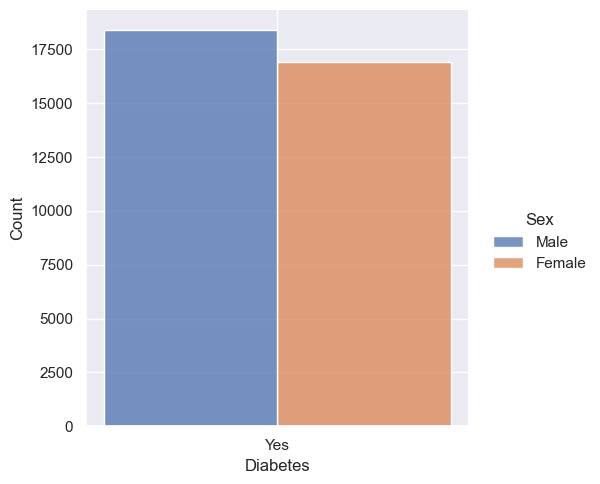

In [20]:
df_with_diabetes = df.loc[df['Diabetes_binary'] == 1.0]
df_with_diabetes = df_with_diabetes.astype({'Diabetes_binary': str, 'Sex': str}) # cast dtypes as str
# replace values in columns with the proper strings
df_with_diabetes.loc[df_with_diabetes['Diabetes_binary'] == '1.0', 'Diabetes_binary'] = 'Yes'
df_with_diabetes.loc[df_with_diabetes['Sex'] == '0.0', 'Sex'] = 'Male'
df_with_diabetes.loc[df_with_diabetes['Sex'] == '1.0', 'Sex'] = 'Female'
df_with_diabetes = df_with_diabetes.rename(columns={'Diabetes_binary': 'Diabetes'}) # rename column
# plot the distribution
sns.displot(data=df_with_diabetes, x='Diabetes', multiple='dodge', hue='Sex')
plt.xticks(ticks=range(0, 1))

Plot the number of smokers and non-smokers with Diabetes

In [21]:
filtered_df2 = df[df['Diabetes_binary'] == 1]
grouped2 = filtered_df2.groupby('Smoker').size().reset_index(name='Count')
grouped2.head()

,Smoker,Count
0,0.0,17029
1,1.0,18317


In [22]:
grouped2.loc[grouped2['Smoker'] == 1.0, 'Smoker'] = 'Yes'
grouped2.loc[grouped2['Smoker'] == 0.0, 'Smoker'] = 'No'

/var/folders/kd/ngqxszg52pd5t5nms3fvmtg40000gn/T/ipykernel_52757/100822146.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Yes' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  grouped2.loc[grouped2['Smoker'] == 1.0, 'Smoker'] = 'Yes'


<Axes: xlabel='Smoker', ylabel='Count'>

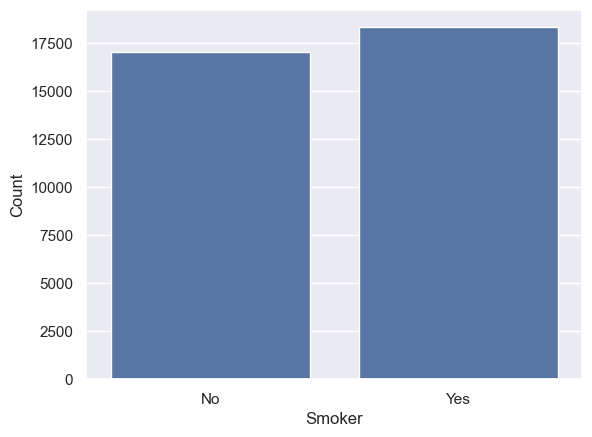

In [23]:
# plot the number of people with diabetes who smoke
sns.barplot(data=grouped2, x='Smoker', y='Count')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Distribution of Data

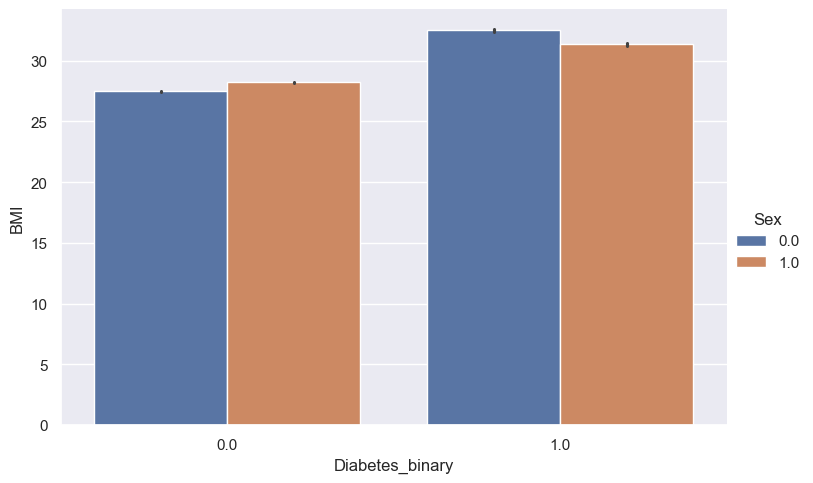

In [25]:
# look at the distribution of BMI between Males and Females
sns.catplot(data=df, x='Diabetes_binary', y='BMI', hue='Sex', kind='bar', height=5, aspect=1.5)

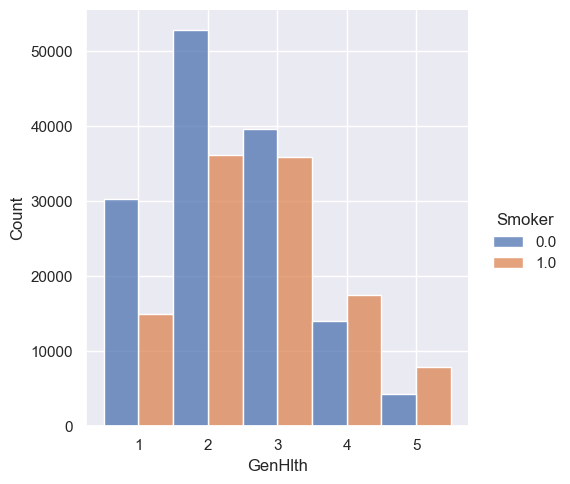

In [26]:
# look at the distribution of general health between smokers and non-smokers
sns.displot(data=df, x="GenHlth", discrete=True, hue='Smoker', multiple='dodge')

### Statistical Relationships

#### Aggregation and representing uncertainty
More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean.

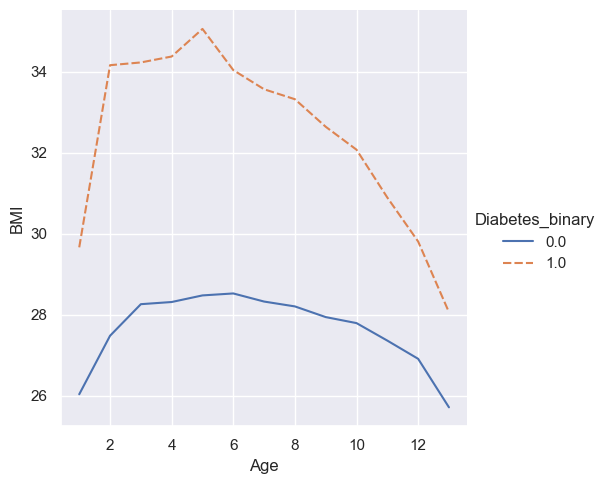

In [27]:
# Age and BMI
sns.relplot(data=df, x='Age', y='BMI', kind='line', hue='Diabetes_binary', style='Diabetes_binary', errorbar=None)

* BMI tends to increase with age until ages 45-49 and then it starts to decrease

* As general health gets worse, BMI increases
* GenHlth: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

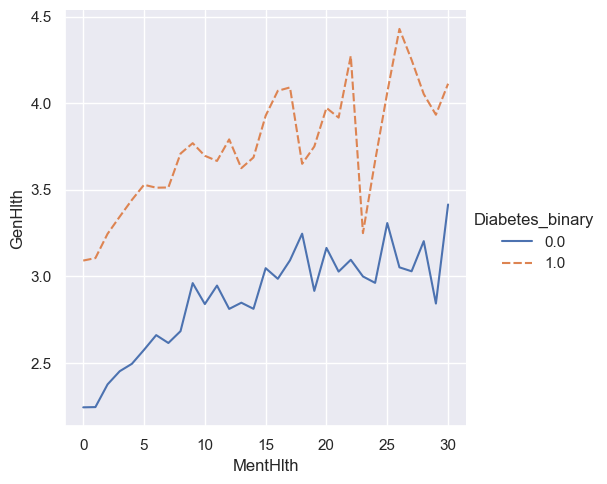

In [29]:
# mental health and general health
sns.relplot(data=df, x='MentHlth', y='GenHlth', kind='line', hue='Diabetes_binary', style='Diabetes_binary', errorbar=None)

* As more days of poor mental health increases, general health worsens

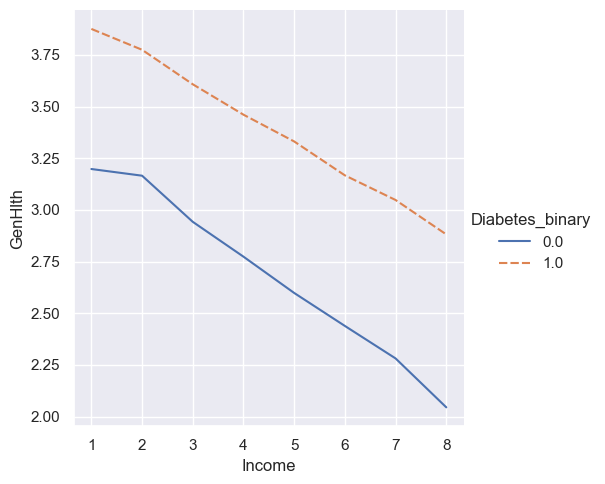

In [30]:
# general health and income
sns.relplot(data=df, x='Income', y='GenHlth', kind='line', hue='Diabetes_binary', style='Diabetes_binary', errorbar=None)

* As income increases, general health improves

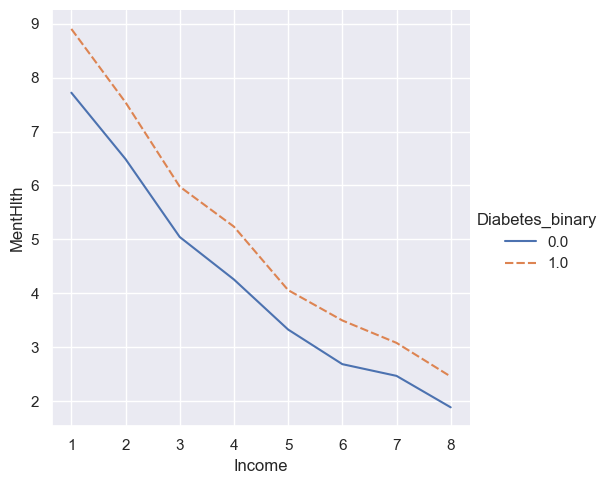

In [31]:
# mental health and income
sns.relplot(data=df, x='Income', y='MentHlth', kind='line', hue='Diabetes_binary', style='Diabetes_binary', errorbar=None)

* As income increases, more days of poor mental health decreases

## Chi-Squared Test

Null Hypothesis (H₀): There is no relationship between high cholesterol and diabetes. In other words, the proportion of people with diabetes is independent of whether they have high cholesterol.

Alternative Hypothesis (H₁): There is a significant relationship between high cholesterol and diabetes. That is, the proportion of people with diabetes is dependent on whether they have high cholesterol.

In [32]:
chi_data = df.loc[:, ['HighChol', 'Diabetes_binary']]
chi_data.head()

,HighChol,Diabetes_binary
0,1.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,1.0,0.0


In [33]:
chi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   HighChol         253680 non-null  float64
 1   Diabetes_binary  253680 non-null  float64
dtypes: float64(2)
memory usage: 3.9 MB


In [34]:
contingency_table = pd.crosstab(chi_data['HighChol'], chi_data['Diabetes_binary'])
print(contingency_table)

Diabetes_binary     0.0    1.0
HighChol                      
0.0              134429  11660
1.0               83905  23686


In [35]:
# Perform Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies: \n{expected}")


Chi-squared statistic: 10174.074889118883
P-value: 0.0
Degrees of Freedom: 1
Expected frequencies: 
[[125733.97873699  20355.02126301]
 [ 92600.02126301  14990.97873699]]


### Interpretation:
* p-value < 0.05, reject the null hypothesis (H₀), meaning there is a statistically significant relationship between high cholesterol and diabetes.

### Calculating Cramér’s V

Cramér's V is an effect size measure for Chi-squared tests, providing insight into the strength of the association between two variables. It's especially useful when working with large datasets because it gives a sense of the magnitude of the association rather than just its statistical significance.

In [36]:
# Chi-squared statistic and number of observations
chi2_stat = chi2  # From the previous chi2_contingency result
n = chi_data.shape[0]  # Total number of observations (253,680)

# Calculate Cramér's V
cramers_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.20026467516249455


How strong is this relationship? 
* Values close to 0 indicate a weak association, therefore the relationship between High Cholesterol and Diabetes isn't practically significant.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Create a Heatmap of correlations
* Use Cramer's V to create a heatmap of correlation between Diabetes and other features.

In [38]:
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = sum(contingency_table.sum())  # Total sample size
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Example usage: Calculate Cramér's V between two categorical variables
cramers_v_corr = cramers_v(df['HighChol'], df['Diabetes_binary'])
print(f"Cramér's V between high cholesterol and diabetes: {cramers_v_corr}")


Cramér's V between high cholesterol and diabetes: 0.20026467516249455


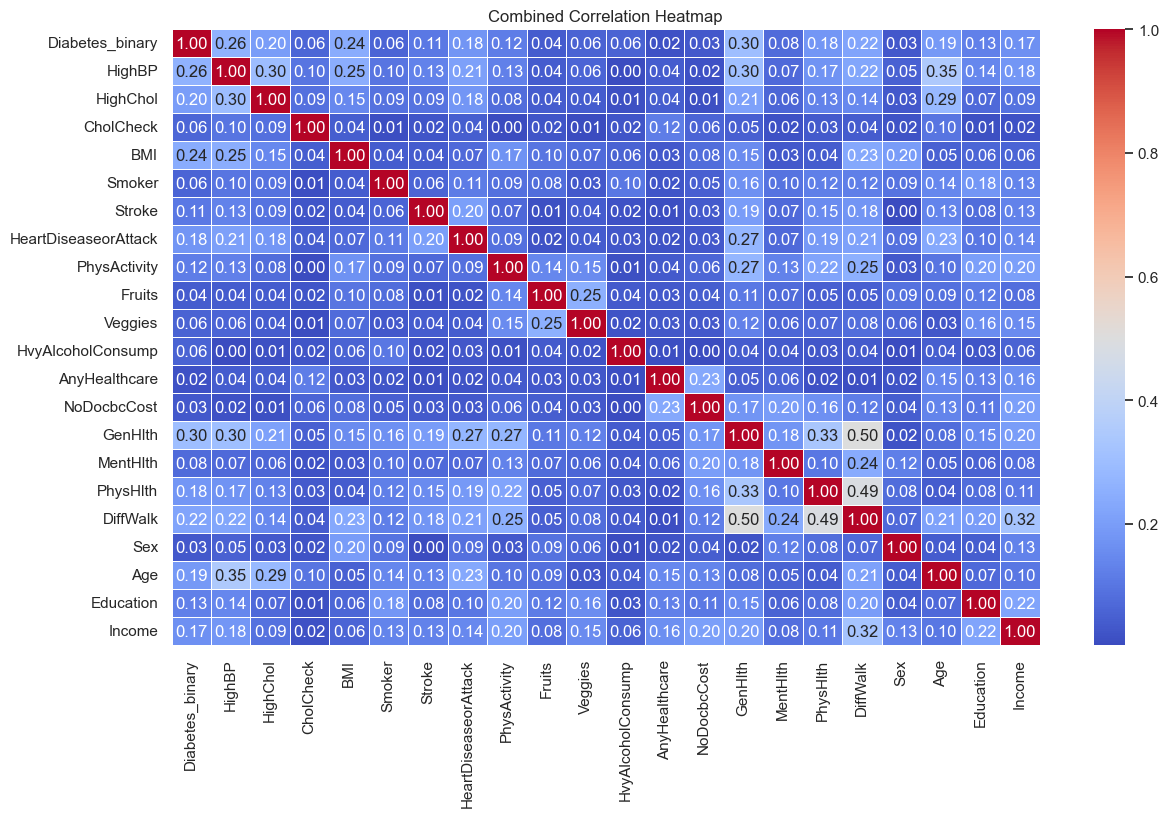

In [39]:
# create an n x n correlation matrix
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate Cramér's V for each pair of categorical variables
def correlation_matrix(df, corr_matrix):
    for col1 in df.columns:
        for col2 in df.columns:
            corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

    corr_matrix = corr_matrix.astype(float).fillna(0)
    np.fill_diagonal(corr_matrix.values, 1)
    return corr_matrix

corr_matrix = correlation_matrix(df, corr_matrix)

# Visualize the combined correlation matrix
def plot_heatmap(corr_matrix):
    plt.figure(figsize=(14, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Combined Correlation Heatmap")
    plt.show()

plot_heatmap(corr_matrix)

* Use features that have a Cramer's V of at least 0.15

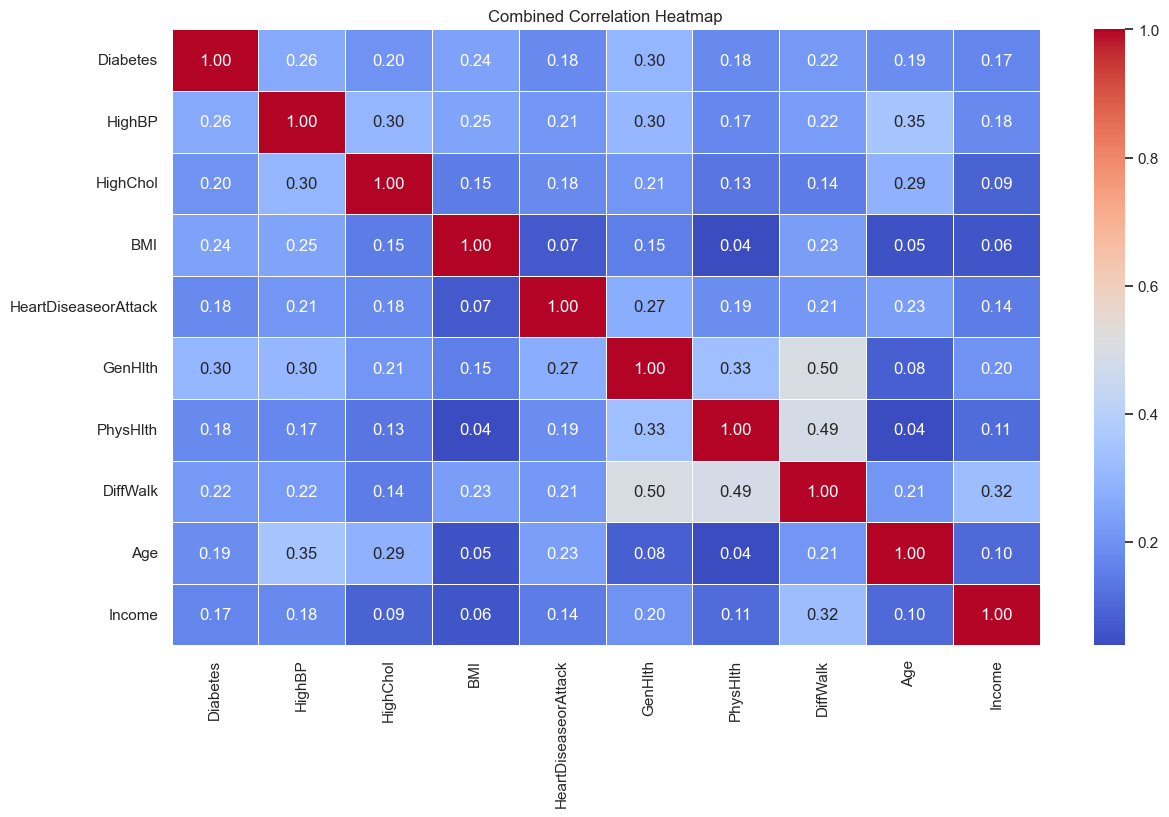

In [40]:
data = df.loc[:, ['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income']]
data = data.rename(columns={'Diabetes_binary': 'Diabetes'})
corr_matrix2 = pd.DataFrame(index=data.columns, columns=data.columns)
corr_matrix2 = correlation_matrix(data, corr_matrix2)
plot_heatmap(corr_matrix2)

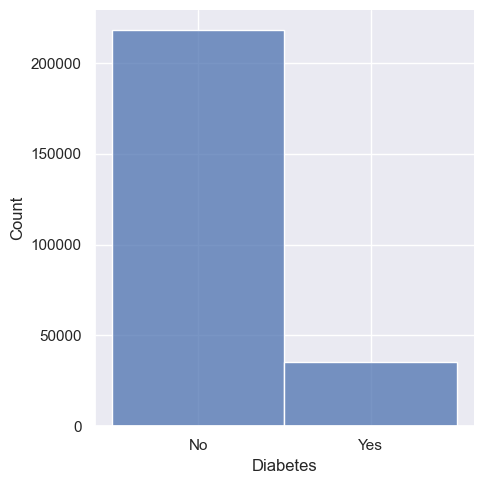

In [41]:
# show the distribution of diabetes diagnosis
p = sns.displot(data=data, x='Diabetes', discrete=True, multiple='dodge')
plt.xticks(ticks=range(0, 2))
p.set_xticklabels(['No', 'Yes'])

### Bar Plots
* Create bar plots to estimate central tendency 
* The bar plot estimates the mean and shows an error bar with a 95% confidence interval

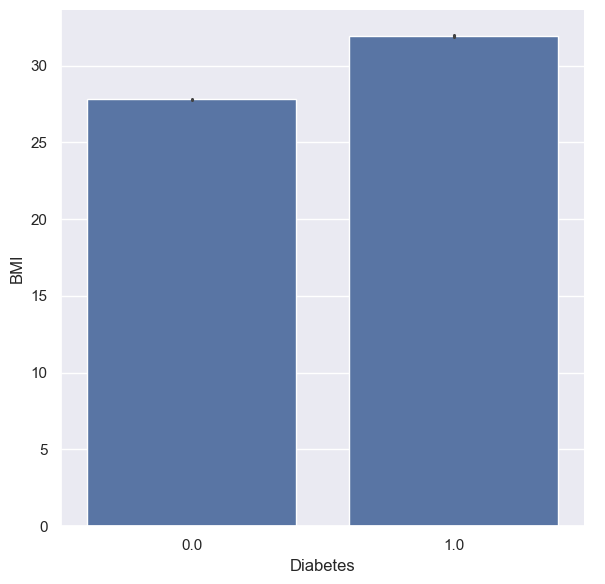

In [42]:
sns.catplot(data=data, x='Diabetes', y='BMI', kind='bar', height=6, aspect=1)

In [43]:
# calculate the average BMI of people with and without Diabetes
with_diabetes = data.loc[data['Diabetes'] == 1.0]
with_diabetes['BMI'].mean()

31.94401063769592

In [44]:
without_diabetes = data.loc[data['Diabetes'] == 0.0]
without_diabetes['BMI'].mean()

27.80577005871738

**Average BMI**
* With Diabetes: 31.94
* Without Diabetes: 27.81

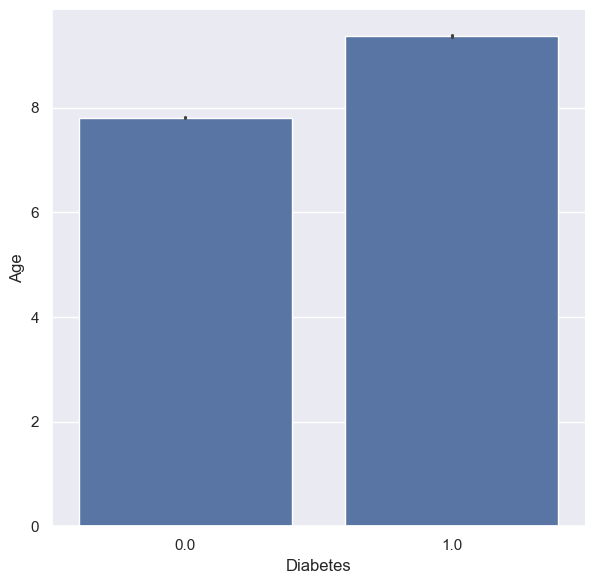

In [45]:
sns.catplot(data=data, x='Diabetes', y='Age', kind='bar', height=6, aspect=1)

In [46]:
with_diabetes['Age'].mean()

9.379052792395179

**Average AGE**
* The average age for patients with diabetes is in category 9, which represents ages 60 to 64.

### Box Plots
* Create box plots to compare distributions
* Shows the three quartile values of the distribution along with extreme values

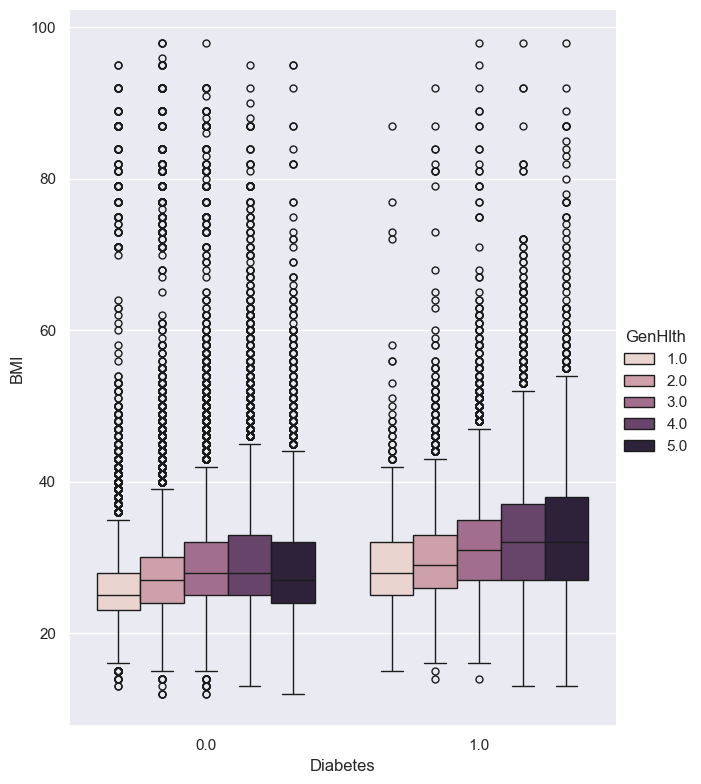

In [47]:
# Visualize the distribution of BMI by Diabetes diagnosis, separated by General Health
# Note: higher GenHlth values indicate worse General Health 
sns.catplot(data=data, x='Diabetes', y='BMI', kind='box', hue='GenHlth', height=8, aspect=0.8)

In [48]:
diabetes_bmi = data.loc[data['Diabetes'] == 1.0]
grouped_bmi_genhhlth = diabetes_bmi.loc[:, ['Diabetes', 'BMI', 'GenHlth']]
grouped_bmi_genhhlth = grouped_bmi_genhhlth.groupby(by='GenHlth')
grouped_bmi_genhhlth.describe()

Diabetes                                         BMI             \
           count mean  std  min  25%  50%  75%  max    count       mean   
GenHlth                                                                   
1.0       1140.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   1140.0  29.395614   
2.0       6381.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   6381.0  30.239774   
3.0      13457.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  13457.0  31.784722   
4.0       9790.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   9790.0  32.899694   
5.0       4578.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   4578.0  33.378550   

                                                 
              std   min   25%   50%   75%   max  
GenHlth                                          
1.0      6.346214  15.0  25.0  28.0  32.0  87.0  
2.0      6.020174  14.0  26.0  29.0  33.0  92.0  
3.0      6.812981  14.0  27.0  31.0  35.0  98.0  
4.0      7.844317  13.0  27.0  32.0  37.0  98.0  
5.0      8.963317  13.0  27.0  32.0  38.0  98.0

Let's look at the distrubution of BMI for General Health (5 = poor)
* Count: 4578
* Mean: 33.379
* Std: 8.963
* Min: 13.0
* 25%: 27.0
* 50%: 32.0
* 75%: 38.0
* Max: 98.0

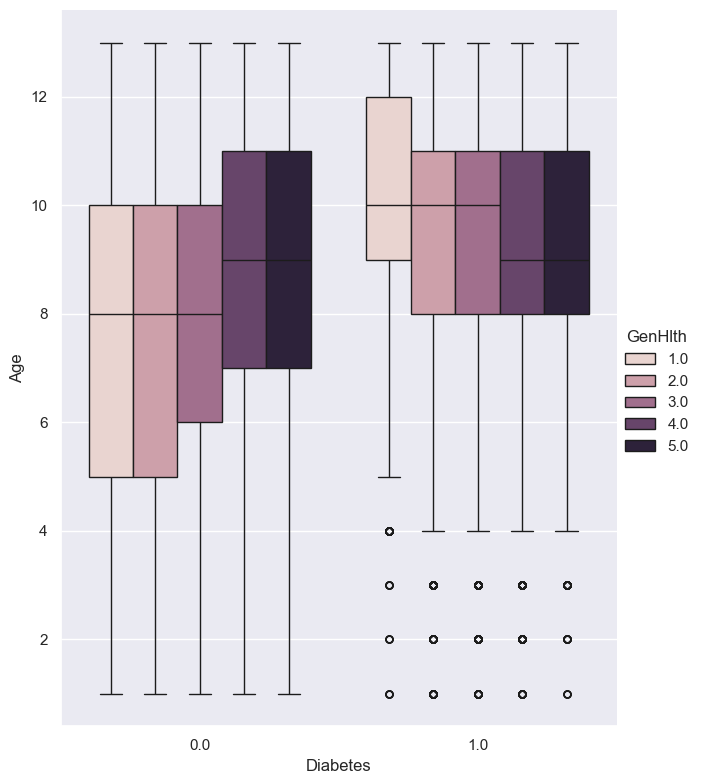

In [49]:
sns.catplot(data=data, x='Diabetes', y='Age', kind='box', hue='GenHlth', height=8, aspect=0.8)